In [47]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import json
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [48]:
path = r'C:\Users\Steven\OneDrive - Cal State LA\Documents\train_metadata.json'
with open(path) as jsonf:
    data = json.load(jsonf)
    


In [49]:

data.keys()

dict_keys(['annotations', 'images', 'categories', 'genera', 'institutions', 'distances', 'license'])

In [50]:
#creating seperate dataframes from metadata
annotations =  pd.json_normalize(data ['annotations'])
categories =  pd.json_normalize(data ['categories'])
images =  pd.json_normalize(data ['images'])
genera =  pd.json_normalize(data ['genera'])
distance =  pd.json_normalize(data ['distances'])
licenses =  pd.json_normalize(data ['license'])
institutions =  pd.json_normalize(data ['institutions'])

In [51]:
del genera
del licenses
del institutions

In [52]:
# Complete df
df = pd.merge(images[['image_id','file_name']],annotations[['genus_id','category_id','image_id']] , on='image_id')
df = pd.merge(df[['genus_id','image_id','file_name','category_id']],categories[['category_id','scientificName','family','genus','species']] , on='category_id')
df['file_path']='C:/Users/Steven/OneDrive - Cal State LA/Documents/images3/'+df['file_name']
df['name']=df['genus']+' '+df['species']
df2 = df[['category_id','genus_id','image_id','family','genus','species','name','file_name','file_path']]

df2.head()

,category_id,genus_id,image_id,family,genus,species,name,file_name,file_path
0,0,1,00000__001,Pinaceae,Abies,amabilis,Abies amabilis,000/00/00000__001.jpg,C:/Users/Steven/OneDrive - Cal State LA/Docume...
1,0,1,00000__002,Pinaceae,Abies,amabilis,Abies amabilis,000/00/00000__002.jpg,C:/Users/Steven/OneDrive - Cal State LA/Docume...
2,0,1,00000__003,Pinaceae,Abies,amabilis,Abies amabilis,000/00/00000__003.jpg,C:/Users/Steven/OneDrive - Cal State LA/Docume...
3,0,1,00000__004,Pinaceae,Abies,amabilis,Abies amabilis,000/00/00000__004.jpg,C:/Users/Steven/OneDrive - Cal State LA/Docume...
4,0,1,00000__005,Pinaceae,Abies,amabilis,Abies amabilis,000/00/00000__005.jpg,C:/Users/Steven/OneDrive - Cal State LA/Docume...


In [53]:
df2['file_path'][5000]

'C:/Users/Steven/OneDrive - Cal State LA/Documents/images3/000/85/00085__004.jpg'

In [54]:
from skimage import util 
from skimage import data, exposure, img_as_float
import matplotlib.pyplot as plt
from skimage import io, exposure, data

In [55]:

import matplotlib.pyplot as plt

from skimage import io, exposure, data

In [73]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.transform import rescale, resize, downscale_local_mean
y=[]
def makeimage(i2,img2):
    #image=mpimg.imread(df_train['file_path'][i2])
    img=imread(df2['file_path'][i2],as_gray=True)
    img=img[100:645,100:545]
    #img=exposure.adjust_sigmoid(img, cutoff=0.5, gain=10, inv=True)
    if(img.shape[0]*img.shape[1]==545*445):
        img2.append(np.reshape(img, (545*445)))
        y.append(df2['category_id'][i2])
    print(len(y))
    #feature_matrix = np.zeros((665,595) )
   #feature_matrix.shape
    
   # for i in range(0,665):
    #    for j in range(0,595):
  #          feature_matrix[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)
    
    #img2.append(np.reshape(feature_matrix, (665*595))) 
    #features.shape

    #print(features)


i2=0
img2=[]
while i2<5000:
    makeimage(i2,img2)
    i2=i2+1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


(565, 495)


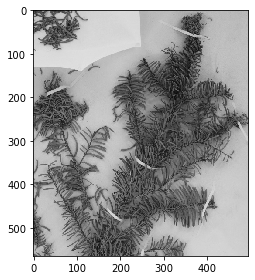

In [61]:
img=imread(df2['file_path'][500],as_gray=True)
img=img[100:665,100:595]
#img=exposure.adjust_sigmoid(img, cutoff=1, gain=0, inv=True)
imshow(img)
print(img.shape)

In [62]:
from sklearn import preprocessing

img2=np.array(img2)
print(np.array(img2).shape)
X=img2
#c
X=preprocessing.scale(X)

(1000, 279675)


In [63]:
y2=np.array(y)

In [64]:
import math
import random
seed= 2
np.random.seed(seed)
pp=math.ceil(random.random()*10)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
from sklearn.metrics import accuracy_score
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=111)
max(y_test)

18

In [67]:
from  sklearn.decomposition  import  PCA

k = 7  #  k  is the number of components (new features) after dimensionality reduction

my_pca = PCA(n_components = k)

# X_Train is feature matrix of training set before dimensionality reduction, 

# X_Train_New is feature matrix of training set after dimensionality reduction:

X_train_new = my_pca. fit_transform(X_train)

X_test_new = my_pca. transform(X_test)

In [68]:
from sklearn import svm

import sklearn.metrics as metrics

clf=svm.SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)

#Train the model using the training sets
clf.fit(X_train_new, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_new)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.145


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# for getting accuracy of our classifiers
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

#my_decisiontree = DecisionTreeClassifier(random_state=3)       
#my_decisiontree.fit(X_train, y_train)
#y_predict = my_decisiontree.predict(X_test)


#my_random_forest= RandomForestClassifier(n_estimators=100, bootstrap=True, n_jobs=-1, random_state=pp)
#my_random_forest.fit(X_train, y_train)
#y_predict =my_random_forest.predict(X_test)

#my_knn_for_cs4661 = KNeighborsClassifier(n_neighbors=4) 
#my_knn_for_cs4661.fit(X_train, y_train)
#y_predict = my_knn_for_cs4661.predict(X_test)
#score_lr = accuracy_score(y_test, y_predict)
#print(score_lr)


Iteration 1, loss = 18.00528688
Iteration 2, loss = 47.20946621
Iteration 3, loss = 43.94624324
Iteration 4, loss = 29.09107348
Iteration 5, loss = 16.62146664
Iteration 6, loss = 9.90591229
Iteration 7, loss = 7.84562154
Iteration 8, loss = 7.29197665
Iteration 9, loss = 6.77344705
Iteration 10, loss = 6.17366229
Iteration 11, loss = 5.91822994
Iteration 12, loss = 5.77291713
Iteration 13, loss = 6.31492213
Iteration 14, loss = 6.09651812
Iteration 15, loss = 5.36727775
Iteration 16, loss = 5.69033144
Iteration 17, loss = 6.30323941
Iteration 18, loss = 6.26695354
Iteration 19, loss = 6.24681624
Iteration 20, loss = 5.93939097
Iteration 21, loss = 5.80783048
Iteration 22, loss = 6.16122538
Iteration 23, loss = 6.65477176
Iteration 24, loss = 6.66082774
Iteration 25, loss = 6.55178658
Iteration 26, loss = 6.36767199
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


0.125